# Machine Learning Explainability

I have implemented 3 ML explainability techniques to interpret how a Random Forest Classifier makes predictions. It will help answer questions such as:<br>
What features in the data did the model think are most important?<br>
For any single prediction from a model, how did each feature in the data affect that particular prediction?<br>
How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?<br>
Thanks to Dan Becker's course on ML Explainability on Kaggle.<br>
View the ML Explainability file for detailed explanations of the techniques.

I build a Random Forest Classifier to predict whether a player from a team won the Man of the Match award based on the match statistics.<br>
I used Kaggle's FIFA 2018 dataset to build this model.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

# Permutation Importance

Permutation Importance is used to calculate the feature importance of a model after it has been fit to the data. It ranks the features from the most important to the least important

In [2]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


# Partial Dependence Plot

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.<br>
This is useful to answer questions like: Controlling all other features, what impact does different goals scored have on Man of the Match being awarded?


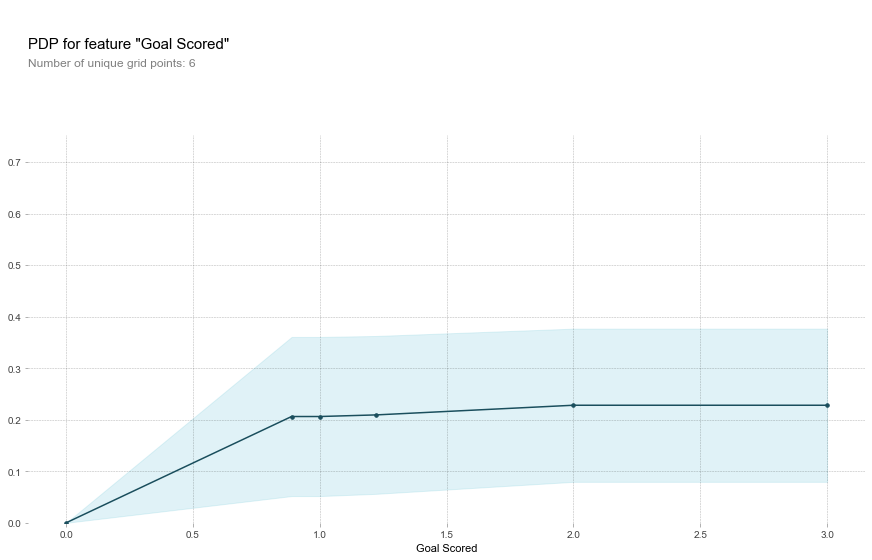

In [3]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
feature_to_plot = 'Goal Scored'
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

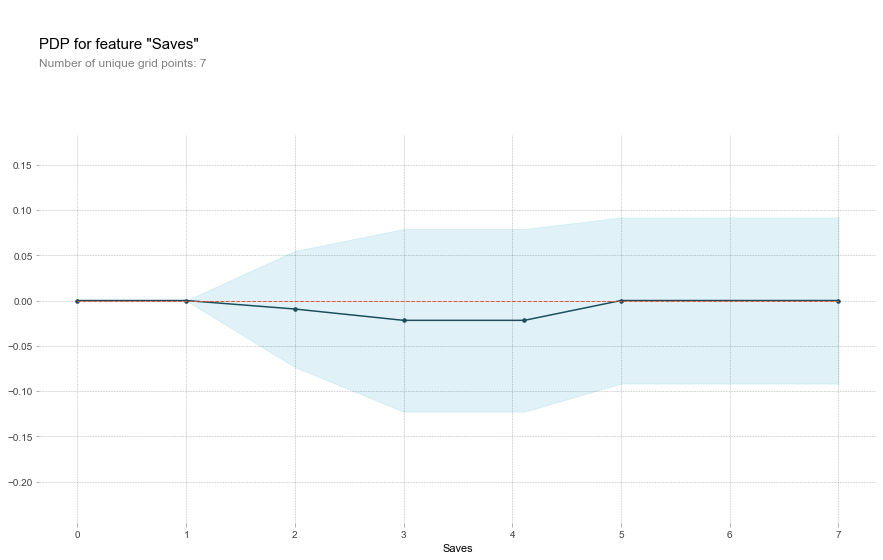

In [4]:
feature_to_plot = 'Saves'
pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

# SHAP Values

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.<br>
This is useful to answer questions like: How much was a prediction driven by the fact that the team scored 3 goals, instead of some baseline number of goals.


In [37]:
row_to_show = 3
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

array([[0.33, 0.67]])

In [38]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [39]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

# SHAP Summary Plots

SHAP summary plots give us a birds-eye view of feature importance and what is driving it. 

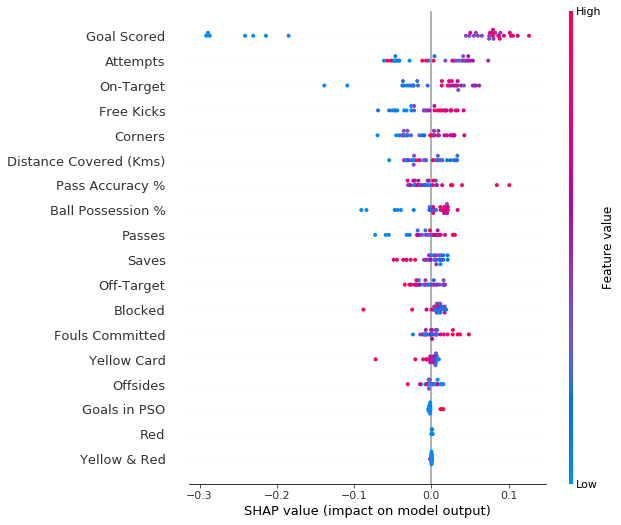

In [34]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)